## Part 1: Create Linear Regression

In [2]:
# To Do: Import data processing packages
import numpy as np
import pandas as pd
import random as rnd

In [3]:
# To Do: Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# To Do: Import scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# To Do: Load Datasets
from sklearn import datasets

In [6]:
# To Do: Load dasasets from scikit learn dataset library
boston = datasets.load_boston()
print(boston.keys()) # biar tau isinya itu apa aja dari datasetsnya 


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
# To Do: Print data description using built-in function from scikit-learn
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
# To Do: Define the data/predictors as the pre-set feature names  
#load data into pandas dataframe
features = pd.DataFrame(boston.data, columns=boston.feature_names) #sby vs columns


In [11]:
# To Do: Print features head list
#print first 5 rows
features.head()
#we can see target value MEDV missing dari data. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# To Do: Print object type of features
print(features.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [13]:
# To Do: Put the target (housing value -- MEDV) in another DataFrame
#MEDV is out target variable, remainings are feature variables
target = pd.DataFrame(boston.target, columns=['MEDV'])
#ktia buat kolum baru 

In [14]:
# To Do: Print target head list
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [15]:
#DATA PREPROCESSING , ENSURING NO MISSING DATA
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [16]:
# To Do: Print object type of features
print(target.head)
print(features.keys())

<bound method NDFrame.head of      MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]>
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


KeyError: 'MEDV'

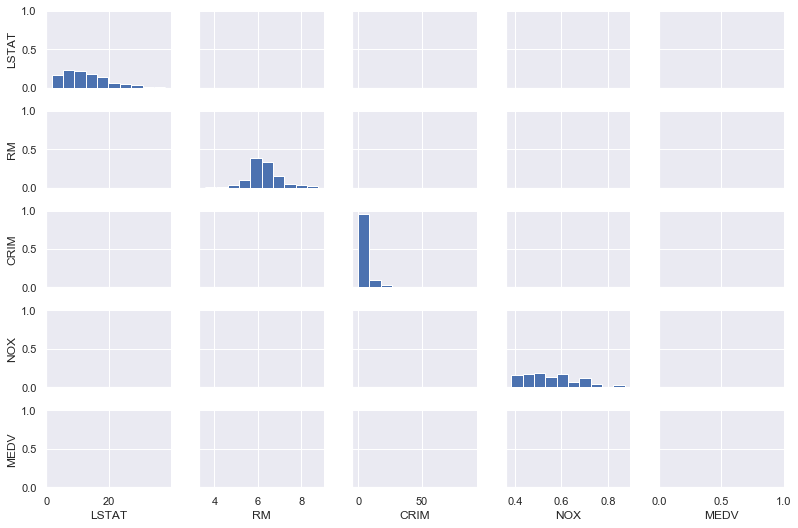

In [17]:
# set the size of the figure
sns.set(rc={'figure.figsize':(12, 8)})

g = sns.PairGrid(features, vars=['LSTAT', 'RM', 'CRIM', 'NOX', 'MEDV'], height=1.5, aspect=1.5)
g = g.map_diag(plt.hist)
g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
                line_kws={'color':'red', 'linewidth': 2})
g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
plt.show()
                                                                                                                                                       

In [18]:
# To Do: Create new object for training
X = features
y = target

In [19]:
# To Do: Create linear regression model
model = LinearRegression()

In [20]:
# To Do: Fit the data to the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# To Do: Calculate model score
model.score(X,y)

0.7406426641094095

In [22]:
# To Do: Calculate b0
model.intercept_

array([36.45948839])

In [23]:
# To Do: Calculate bn for n= number of features
model.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [24]:
# To Do: Calculate predictions using regressor data as input, and print five first result
predictions = model.predict(X)
print(predictions[0:5])

[[30.00384338]
 [25.02556238]
 [30.56759672]
 [28.60703649]
 [27.94352423]]


## Part 2: Split Data for Train and Test

In [25]:
# To Do: Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
# To Do: Make sure the X_train data shape
X_train.shape

(404, 13)

In [33]:
print(X_train)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
220   0.35809   0.0   6.20   1.0  0.507  6.951  88.5  2.8617   8.0  307.0   
71    0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
240   0.11329  30.0   4.93   0.0  0.428  6.897  54.3  6.3361   6.0  300.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605   5.0  311.0   
417  25.94060   0.0  18.10   0.0  0.679  5.304  89.1  1.6475  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
323   0.28392   0.0   7.38   0.0  0.493  5.708  74.3  4.7211   5.0  287.0   
192   0.08664  45.0   3.44   0.0  0.437  7.178  26.3  6.4798   5.0  398.0   
117   0.15098   0.0  10.01   0.0  0.547  6.021  82.6  2.7474   6.0  432.0   
47    0.22927   0.0   6.91   0.0  0.448  6.030  85.5  5.6894   3.0  233.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572  88.5  2.5961   5.0  296.0   

     PTRATIO       B  LSTAT  
220     17.4  391.70   9.71  
71      19.2  3

In [27]:
# To Do: Make sure the y_train data shape
y_train.shape

(404, 1)

In [28]:
# To Do: Make sure the X_test data shape
X_test.shape

(102, 13)

In [29]:
# To Do: Make sure the y_test data shape
y_train.shape

(404, 1)

In [30]:
# To Do: Create regressor and fit data train
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# To Do: Calculate model score for data train
train_score = regressor.score(X_train,y_train)
print('data train - coefficient of determination:', train_score)

data train - coefficient of determination: 0.7730135569264234


In [32]:
# To Do: Calculate model score for data test
test_score = regressor.score(X_test,y_test)
print('data test - coefficient of determination:', test_score)

data test - coefficient of determination: 0.5892223849182507


## Part 3: Combine Data

In [ ]:
# To Do: Create new dataframe containing features and target
combine = features.copy()
combine.head()

In [ ]:
# To Do: Combine both datasets
combine['MEDV'] = target
combine.head()

In [ ]:
# To Do: Make sure the combine data shape
combine.shape

In [ ]:
# To Do: Using pandas function, describe combine dataframe
combine.describe()

In [ ]:
# To Do: Make sure there are no null value
combine.isnull().any()

## Part 4: Data Visualization

In [ ]:
# To Do: Inspect MEDV histogram
target.hist()

In [ ]:
# To Do: Inspect CRIM histogram
features['CRIM'].hist()

In [ ]:
# To Do: Inspect LSTAT histogram
features['LSTAT'].hist()

## Part 5: Homework 2

Create multiple linear regression model using only three features from features dataframe to predict MEDV. 
The three features must be chosen based on analysis.
Utilize pandas and seaborn to process and visualize data.
Aim for the highest score as possible as you can.

Submission start: March, 9th 2020.
Submission end:   March, 16th 2020.

Buat linear regression dari 3 fitur yang menurut kita paling ngaruh, jelaskankenapa memilih fitur tsb dan raih akurasi setinggi mungkin

In [ ]:
#To make a new data frame of features
#df = features.copy()
#To combine data frame features and target
#df['MEDV'] = target
#print(df.keys())
bos_ton= pd.DataFrame(boston.data, columns=boston.feature_names)
bos_ton['MEDV']= target
print(bos_ton.keys())

In [ ]:
#compute pair wise corelation
correlation_matrix = bos_ton.corr(method='pearson').round(2)
#heat map function untuk plot corellation matrix
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

In [ ]:
print(bos_ton.shape)

In [ ]:
#Choose the biggest absoluve value of features correlation: RM, LSTAT, PTRATIO
bos_ton = bos_ton.drop([ "CRIM","NOX","AGE", "INDUS", "CHAS",  "ZN", "DIS", "B","MEDV"], axis=1)


In [ ]:
print(bos_ton.keys())
print(target.keys())

In [ ]:
X=bos_ton
y=target
print(X.shape)
print(y.shape)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
predictions=model.predict(X)
print(predictions[0:5])

In [ ]:
#Splitting data test_size=0.2 (80%-20% train vs test)
#assign random_state to any value ensuring consistency
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#create regressor
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.coef_)
print(regressor.intercept_)

#model evaluation for training set
y_train_predict= regressor.predict(X_train)
r2=r2_score(y_train,y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('Linear model performance for training set')
print('RMSE :', rmse)
print('R-squared: ',r2)



In [ ]:
y_test_predict=regressor.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
 
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

In [ ]:
y_train_residual = y_train_predict - y_train
y_test_residual = y_test_predict - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set')

plt.show()

In [ ]:
train_score=regressor.score(X_train,y_train)
print("data train :", train_score)

In [ ]:
test_score=regressor.score(X_test,y_test)
print("data test:",test_score)

In [ ]:
#BATASSS
#we can conclude that the straight line is unable to capture the pattern in the data. this is an example of underfitting
#To overcome underfitting, we need to increase the complexity of the model, this coould be done by converting
#the original features into their 

In [ ]:
# To improve the accuracy: polynomial features
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))



In [ ]:

y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

In [ ]:
# evaluating the model on test data-set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_train))
print("R2 score of test set is {}".format(r2_train))

In [ ]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

In [ ]:
#Referensi
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
#https://www.kaggle.com/kunalc101/boston-housing-linear-and-polynomial-regression